In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Данные

In [2]:
data = pd.read_csv('Pokemon.csv' , sep = ',', engine = 'python')

Набор данных содержит 800 экземпляров, описанных 13 признаками: `#`, `Name`, `Type 1`, `Type 2`, `Total`, `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, `Generation`, `Legendary`.

In [3]:
print(data.shape)
print(data.columns)

(800, 13)
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


Каждый экземпляр представляет собой описание конкретного персонажа (pokemon-а) из серии компьютерных игр Pokémon. Покедекс - внутриигровой каталог pokemon-ов.

- `#` - номер pokemon-а в покедексе
- `Name` - наименование в покедексе
- `Type 1` - обязательный тип pokemon-а
- `Type 2` - необязательный тип pokemon-а
- `Total` - сумарное значение всех статистических данных по рассматриваемому экземпляру
- `HP` - единицы здаровья
- `Attack` - единицы наносимого урона (атаки)
- `Defense` - единицы отражаемого урона (защиты)
- `Sp. Atk` - единицы наносимого урона во время специальной атаки
- `Sp. Def` - единицы отражаемого урона во время специальной атаки
- `Speed` - единицы скорости
- `Generation` - поколение pokemon-ов (в каком обновлении появился рассматриваемый pokemon)
- `Legendary` - легендарность (фактически, редкость рассматриваемого pokemon-а)

In [4]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
data.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [6]:
data.index

RangeIndex(start=0, stop=800, step=1)

In [7]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Построим матрицу рассеяния, чтобы рассмотреть корреляцию между парами признаков:

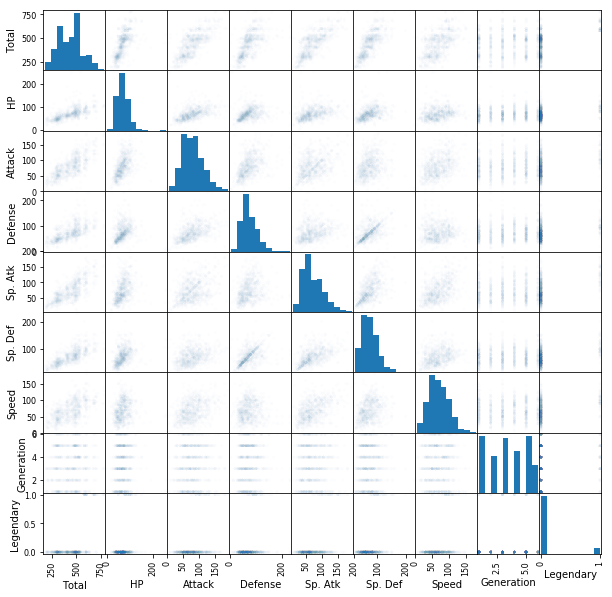

In [241]:
from pandas.plotting import scatter_matrix

#преобразуем столбец data['Legendary'] типа bool к целочисленному типу, чтобы включить его в матрицу рассеяния
data['Legendary'] = np.where(data['Legendary'], 1, 0)

scatter_matrix(data.iloc[:, 4:13], alpha = .01, figsize = (10, 10))
pass

Можно заметить, что по многим признакам наблюдается почти линейная зависимость. Более всего это заметно для Defense и Sp. Def:

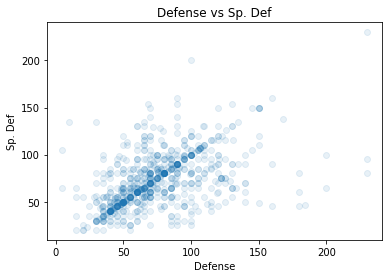

In [242]:
plt.plot(data['Defense'], data['Sp. Def'], 'o', alpha = 0.1)
plt.xlabel('Defense')
plt.ylabel('Sp. Def')
plt.title('Defense vs Sp. Def')
pass

In [243]:
data.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


Если теперь рассмотреть отдельно сумарное значение по всем показателям `Total`, поколение `Generation` и легендарность `Legendary`, то будет видно, что в каждом поколении pokemon-ы с наивысшими показателями являются легендарными, что вполне ожидаемо.

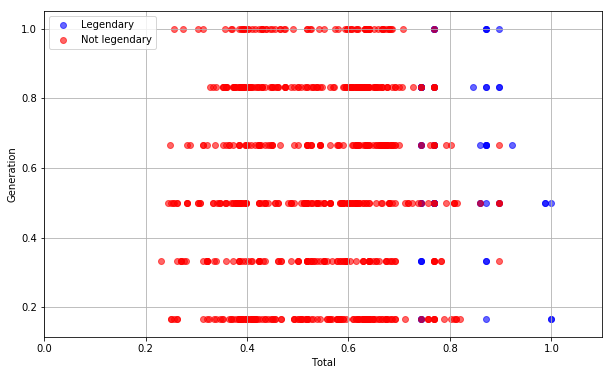

In [244]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Legendary'] == 1]['Total'] / np.max(data['Total']),
            data[data['Legendary'] == 1]['Generation'] / np.max(data['Generation']),
            alpha = 0.6,
            label = 'Legendary',
            color = 'b')

plt.scatter(data[data['Legendary'] == 0]['Total'] / np.max(data['Total']),
            data[data['Legendary'] == 0]['Generation'] / np.max(data['Generation']),
            alpha = 0.6,
            label = 'Not legendary',
            color = 'r')

plt.title('')
plt.xlabel('Total')
plt.ylabel('Generation')
plt.xlim(0, 1.1)
plt.legend()
plt.grid()

### Подготовка данных

In [245]:
data.describe(include = 'all')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800,800,414,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
unique,NaN,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Wobbuffet,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,362.813750,NaN,NaN,NaN,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,208.343798,NaN,NaN,NaN,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,1.000000,NaN,NaN,NaN,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,184.750000,NaN,NaN,NaN,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,364.500000,NaN,NaN,NaN,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,539.250000,NaN,NaN,NaN,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000


Как уже упоминалось ранее, признак `Type 2` не является обязательным для экземпляра, потому его значение есть не всегда:

In [246]:
data.count(axis = 0)

#             800
Name          800
Type 1        800
Type 2        414
Total         800
HP            800
Attack        800
Defense       800
Sp. Atk       800
Sp. Def       800
Speed         800
Generation    800
Legendary     800
dtype: int64

Всвязи со спецификой признака `Type 2`, его нельзя заменить самым популярным в столбце, а учитывая, что его нет почти у половины экземпляров, то удалять строки с пропущенным значением будет значить сократить набор данных вдвое. Потому столбец с этим признаком просто удаляется. 

Так же логичным будет убрать столбец с наименованием (`Name`), поскольку он уникален для каждого экземпляра. 

In [283]:
data = data.drop('Name',   axis = 1)\
           .drop('Type 2', axis = 1)

#Для повторного исследования можно убрать и признак 'Total', поскольку он делает задачу слишком простой
#data = data.drop('Total', axis = 1)

data.count(axis = 0)

#             800
Type 1        800
Total         800
HP            800
Attack        800
Defense       800
Sp. Atk       800
Sp. Def       800
Speed         800
Generation    800
Legendary     800
dtype: int64

Для удобства, разделим исходный набор `data` на два поднабора `data_categorical` и `data_numerical`, содержащие категориальные и количественные признаки соответственно.

In [284]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object' and data[c].name != 'Legendary']

data_categorical = data[categorical_columns]
data_numerical = data[numerical_columns]

Причем в набор количественных признаков не включается признак `Legendary`, поскольку он уже приведен к виду меток класса и более менять его не нужно.

#### Категориальные признаки

Чтобы работать с категориальными признаками проводится процедура векторизации, где последний оставшейся категориальны призак `Type 1` заменяется на множество бинарных количественных признаков, включеющее в себя все значения признака `Type 1` (а их 18) и далее, когда экземпляр принимает некоторое значение из этого множества, то соотверствующий бинарный признак принимает значение `1`, а остальные - `0`.

In [285]:
data_categorical = pd.get_dummies(data_categorical)
print(data_categorical.columns)

Index(['Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric',
       'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying',
       'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice',
       'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock',
       'Type 1_Steel', 'Type 1_Water'],
      dtype='object')


#### Количественне признаки

In [286]:
data_numerical.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Приведем каждый количественный признак к нулевому среднему и единичному среднеквадратичному отклонению:

In [287]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-2.325917e-16,-1.160183e-16,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.736619e+00,-2.126509e+00,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00
25%,-8.546631e-01,-8.761240e-01,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01
50%,8.093593e-03,1.241841e-01,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01
75%,8.468515e-01,6.660176e-01,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00
max,1.719208e+00,2.875031e+00,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00


#### Окончательный набор данных

In [288]:
data = pd.concat((data_categorical, data_numerical, data['Legendary']), axis = 1)
print(data.shape)

(800, 28)


In [289]:
data.describe()

,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,...,Type 1_Water,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,...,800.000000,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,0.086250,0.038750,0.040000,0.055000,0.021250,0.033750,0.06500,0.005000,0.040000,0.087500,...,0.140000,-2.325917e-16,-1.160183e-16,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15
std,0.280908,0.193119,0.196082,0.228123,0.144307,0.180698,0.24668,0.070578,0.196082,0.282743,...,0.347204,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,-1.736619e+00,-2.126509e+00,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,-8.546631e-01,-8.761240e-01,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,8.093593e-03,1.241841e-01,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,8.468515e-01,6.660176e-01,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.719208e+00,2.875031e+00,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00


Разбиваем данные на `X` и `y`: 

In [290]:
X = data.drop(('Legendary'), axis = 1)
y = data['Legendary']
feature_names = X.columns

In [291]:
print(X.shape)
print(y.shape)
N, d = X.shape

(800, 27)
(800,)


Разбиваем данные на `test` и `train`:

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

560 240


### kNN

In [293]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [294]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

#### Ошибка

1-ый способ:

In [295]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.039285714285714285 0.04583333333333333


2-ой способ:

In [296]:
err_test = 1 - knn.score(X_test, y_test)

In [297]:
err_test

0.04583333333333328

Так же можно рассмотреть ошибки первого и второго рода:

In [298]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[221   4]
 [  7   8]]


In [299]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

Здесь:

`[[TP FP]
  [FN TN]]`

#### Подбор параметров

In [300]:
from sklearn.model_selection import GridSearchCV

nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.048214285714285765 5


In [301]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.03571428571428571 0.05


### SVC

In [302]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.02857142857142857 0.041666666666666664


#### Подбор параметров

In [303]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.042857142857142816 1.0


In [304]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.03571428571428571 0.05


### Random Forest

In [305]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.025


#### Значимость признаков

In [306]:
np.sum(rf.feature_importances_)

0.9999999999999996

In [307]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'Total' (0.284650)
 2. feature 'Sp. Atk' (0.119707)
 3. feature '    #' (0.094182)
 4. feature '   HP' (0.088922)
 5. feature 'Speed' (0.088042)
 6. feature 'Sp. Def' (0.086231)
 7. feature 'Attack' (0.074516)
 8. feature 'Defense' (0.053932)
 9. feature 'Generation' (0.032201)
10. feature 'Type 1_Water' (0.011912)
11. feature 'Type 1_Psychic' (0.011033)
12. feature 'Type 1_Dragon' (0.010533)
13. feature 'Type 1_Normal' (0.005257)
14. feature 'Type 1_Fire' (0.004841)
15. feature 'Type 1_Steel' (0.004596)
16. feature 'Type 1_Bug' (0.004226)
17. feature 'Type 1_Ice' (0.004136)
18. feature 'Type 1_Flying' (0.004106)
19. feature 'Type 1_Electric' (0.003546)
20. feature 'Type 1_Grass' (0.003178)
21. feature 'Type 1_Ground' (0.003010)
22. feature 'Type 1_Rock' (0.002641)
23. feature 'Type 1_Dark' (0.001754)
24. feature 'Type 1_Fighting' (0.001396)
25. feature 'Type 1_Ghost' (0.001029)
26. feature 'Type 1_Fairy' (0.000327)
27. feature 'Type 1_Poison' (0.000095)


(-1, 20)

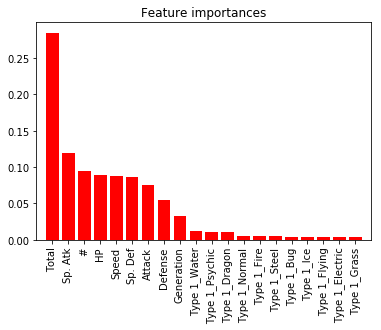

In [308]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

На основе полученной гистограммы можно сделать вывод, что признак `Type` практически не влиял на обучение, а самым значимым был признак `Total`. Это совсем неудивительно, поскольку такая очевидная зависимость наблюдалась еще при первичном анализе данных.